In [2]:
%load_ext autoreload
%autoreload 2
import miniGPT
import torch
import numpy as np
import json
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

/home/tau/emenier/miniconda3/envs/Fin/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [58]:
text, data, vocab_size, tokenizer = miniGPT.data_utils.get_tolkien_data()
data = data.to(device,torch.long)

Model Numbers : 
   Context   : 1024 tokens
   Embedding :  768 tokens
   Layers    :   12
   Heads     :   12
   Params    : 102 M


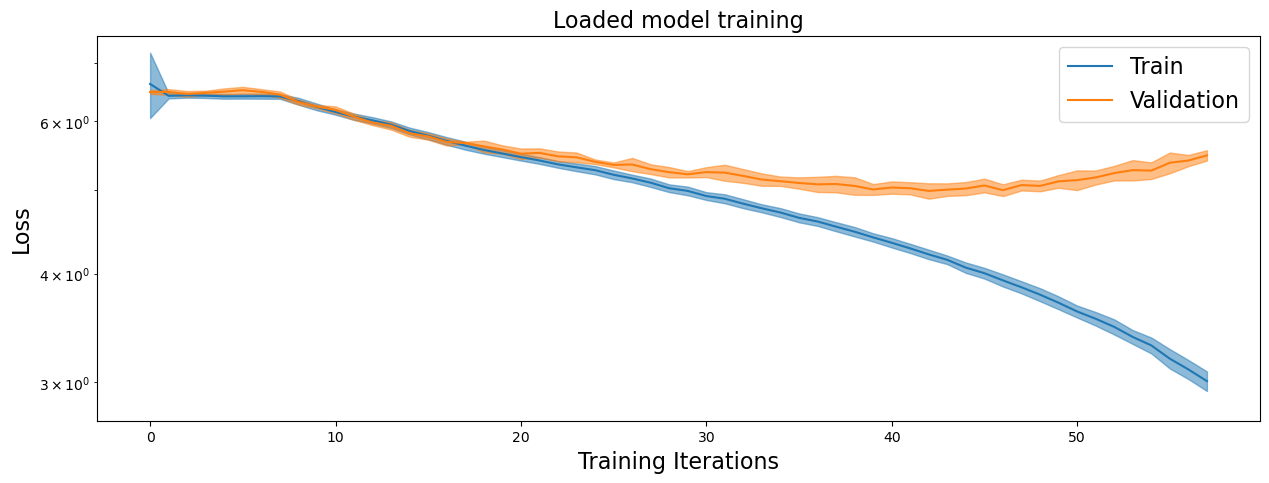

In [67]:
savedir = '/home/tau/emenier/data/GPT/DecoderGPT/SplitGPUTolkien/'
lr = 3e-4
dtype = torch.float32
max_block_size = 1024 # what is the maximum context length for predictions?
n_heads = 12
C = n_heads*64
n_layer = 12
dropout = 0.1

gpt_model = miniGPT.gpt.DecoderGPT(vocab_size, C, n_layer, n_heads, 
                    max_block_size, dropout_freq=dropout).to(device,dtype)

trainer = miniGPT.train_utils.DecoderGPTtrainer(gpt_model,lr,
                    checkpoint_path=savedir,wd=1e-5)
dic = trainer.load('last_model.trch')
trainer.gpt_model.eval()
train_dataset = miniGPT.train_utils.TextDataset(
                data[:int(0.9*len(data))],max_block_size)
val_dataset = miniGPT.train_utils.TextDataset(
                data[int(0.9*len(data)):],max_block_size)

miniGPT.plot_utils.model_numbers(gpt_model,max_block_size,n_layer,C, n_heads)
miniGPT.plot_utils.plot_losses(dic)

In [69]:
ix = np.random.choice(len(val_dataset))
gen_length = 75
x,y = val_dataset.data[ix:ix+max_block_size],val_dataset.data[ix:ix+max_block_size+gen_length]
x, y = x.reshape(1,*x.shape), y.reshape(1,*y.shape)
with torch.no_grad():
    ret = trainer.gpt_model.generate(x,gen_length)
decoded_gen = tokenizer.decode(ret[0,max_block_size:].detach().cpu().numpy())
decoded_truth = tokenizer.decode(y[0,max_block_size-10:max_block_size].detach().cpu().numpy())
decoded_truth_2 = tokenizer.decode(y[0,max_block_size-10:].detach().cpu().numpy())
print(decoded_truth + ' ----- ' + decoded_gen)
print()
print('-------------')
print(decoded_truth_2)
print()

100%|██████████| 75/75 [00:01<00:00, 38.37it/s]

 will come at last when I  Shall take the -----  Sun-water  when our spring  some fall and other of winter,  they can tell  nor shake  from the Sea  of the Elder.    From last of them the world grows!    That are empty! And we begin  to me and stone.  Where were melodies?" "Say you? " asked Frodo. "But we are not wanted the gloomy

-------------
 will come at last when I  Shall take the hidden paths that run  West of the Moon, East of the Sun. And as if in answer, from down below, coming up the road out of the valley, voices sang: A! Elbereth Gilthoniel!  silivren penna míriel  o menel aglar elenath,  Gilthoniel, A! Elbereth!    We still remember, we who dwell  In this far land beneath the trees



In [10]:
torch.cuda.device_count()

1

In [23]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

In [24]:
tokenizer.encode(text[:100])

[220,
 220,
 1649,
 1770,
 13,
 24207,
 2127,
 49329,
 1040,
 286,
 20127,
 5268,
 3414,
 326,
 339,
 561,
 8972,
 307,
 17499,
 465,
 9766,
 1151,
 88,
 12,
 69,
 343]